## Hydrometeor Classification in Radars using Machine Learning

Set Attributes:<br>
1. Number of features=6
2. Number of categories=11
3. Dataset size=263538
4. Filtered Dataset size=110659
5. Train-Test Split=2/3:1/3
6. Algorithms to be tested: Random guess, Gaussian Naive Bayes, Decision Tree Learner, KNN
<br>
This study will form the basis to develop a deeper neural network. This is a single datafile and the larger file will have around 3 million points (Large enough data).

In [35]:
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
os.chdir('C:/Users/yashg/OneDrive/Desktop/CMU/Project/December/Matthews_Radar_files')

In [36]:
f1='20110520_0612_grid_combined.cdf'
data=Dataset(f1)

In [37]:
data.variables.keys()

dict_keys(['DZ', 'U', 'V', 'Con', 'Vor', 'Wvar', 'VT', 'HID', 'CS', 'x', 'y', 'z'])

In [38]:
ref=np.ma.filled(data['DZ'][:].flatten())
u=np.ma.filled(data['U'][:].flatten())
v=np.ma.filled(data['V'][:].flatten())
con=np.ma.filled(data['Con'][:].flatten())
Vor=np.ma.filled(data['Vor'][:].flatten())
Wvar=np.ma.filled(data['Wvar'][:].flatten())
hid=np.ma.filled(data['HID'][:].flatten())
cols=['Reflectivity','U','V','Con','Vor','Wvar','HID']
var=[ref,u,v,con,Vor,Wvar,hid]

In [51]:
d={}
for i,kk in enumerate(cols):
    d.update({kk:var[i]})
df=pd.DataFrame(d)

263538


In [40]:
badval=data['DZ'].bad_value

In [52]:
col=df.columns
for m in col:
    df=df[df[m]!=badval]

110659

In [42]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Decision Tree Classifier

In [44]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_tr=model.predict(X_train)
from sklearn.metrics import accuracy_score

dt_acc=accuracy_score(y_test, y_predict)
dt_train=accuracy_score(y_train, y_tr)

## KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
y_tr=model.predict(X_train)
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test, y_predict)
knn_train=accuracy_score(y_train, y_tr)

## Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
gnb_tr=gnb.predict(X_train) 
# accuracy on X_test 
gnb_acc= gnb.score(X_test, y_test)
gnb_tr= gnb.score(X_train, y_train)

## Random Guessing

In [47]:
import random
random.seed(42)
y_pred=np.random.randint(-1,10,len(y_test))
y_tr=np.random.randint(-1,10,len(y_train))
r_acc=accuracy_score(y_test,y_pred)
r_tr=accuracy_score(y_train,y_tr)

## Comparing Performance

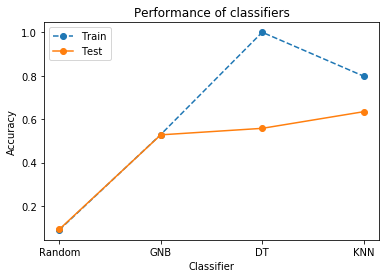

In [50]:
classifiers=['Random','GNB','DT','KNN']
acc=[r_acc,gnb_acc,dt_acc,knn_acc]
acc_tr=[r_tr,gnb_tr,dt_train,knn_train]
import matplotlib.pyplot as plt
plt.plot(classifiers,acc_tr,'o--',label='Train')
plt.plot(classifiers,acc,'o-',label='Test')
plt.legend()
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Performance of classifiers')
plt.show()